## DSP Task (number 7)

Выполнено студентом группы 716 Косиковым Виктором

### Условие

Предложите свой дискретный детерминированный сигнал. Для данного сигнала
найдите оконное дискретное преобразование Фурье с длиной окна $\frac{1}{10}$ длины
сигнала и сдвигом окна относительно предыдущего значения в $\frac{1}{4}$ длины окна.

### Выполнение

Давайте создадим детерминированный дискретный сигнал

In [83]:
#импортируем модули
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft

%matplotlib inline

# Select: plot, stem, bar
def plt_sel(s, *args, **kwargs):
    if s == 0:
        return plt.plot(*args)
    if s == 1:
        return plt.stem(*args, **kwargs)
    if s == 2:
        return plt.step(*args)
#количество отсчетов
N = 80

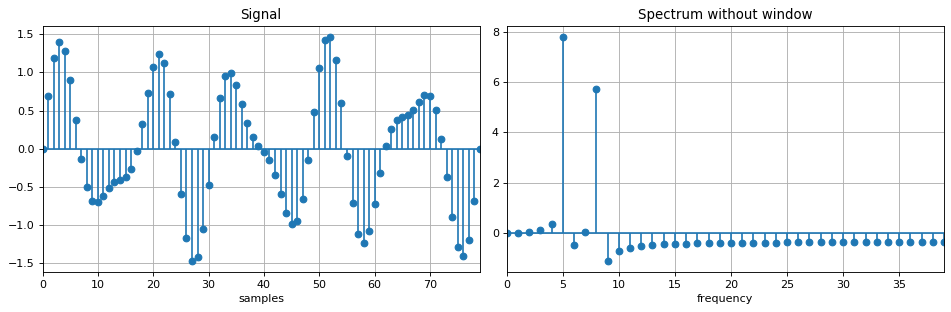

In [84]:
X = fft(r)
# Построение результатов
fig = plt.figure(figsize=(12, 4), dpi=80)
# Сам сигнал
plt.subplot(1, 2, 1)
plt.title('Signal')
plt.stem(r, use_line_collection=True, basefmt='C0')
plt.xlim([0, N-1])
plt.xlabel('samples')
plt.grid()

# ДПФ
plt.subplot(1, 2, 2)
plt.title('Spectrum without window')
plt.stem(X, use_line_collection=True, basefmt='C0')
plt.xlim([0, N//2-1])
plt.xlabel('frequency')
plt.grid()
plt.tight_layout()

In [85]:
#создаем треугольное окно размера 1/10 сигнала
from scipy.signal.windows import bartlett
w = bartlett(N // 10) 
w_add = np.zeros(N - (N//10))
window = np.concatenate((w, w_add))
ywf = fft(r*window)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

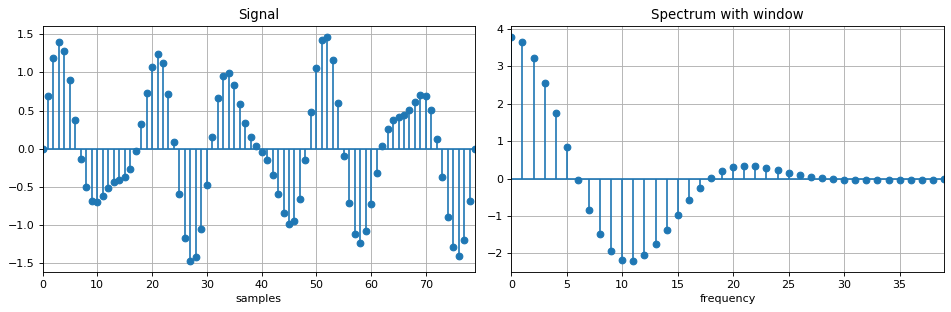

In [86]:
# Строим графики
fig = plt.figure(figsize=(12, 4), dpi=80)
# Сам сигнал
plt.subplot(1, 2, 1)
plt.title('Signal')
plt.stem(r, use_line_collection=True, basefmt='C0')
plt.xlim([0, N-1])
plt.xlabel('samples')
plt.grid()

# ДПФ с окном
plt.subplot(1, 2, 2)
plt.title('Spectrum with window')
plt.stem(ywf, use_line_collection=True, basefmt='C0')
plt.xlim([0, N//2-1])
plt.xlabel('frequency')
plt.grid()
plt.tight_layout()

In [87]:
#смещаем сигнал
bias = np.zeros(len(w) // 4)
window_biased = np.concatenate((bias, w, np.zeros(len(w_add) - len(bias))))
ywfb = fft(r*window)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

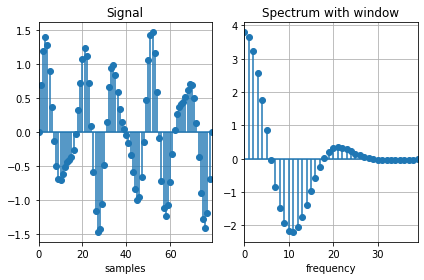

In [88]:
#Сам сигнал
plt.subplot(1, 2, 1)
plt.title('Signal')
plt.stem(r, use_line_collection=True, basefmt='C0')
plt.xlim([0, N-1])
plt.xlabel('samples')
plt.grid()

# Его ДПФ со смещенным окном
plt.subplot(1, 2, 2)
plt.title('Spectrum with window')
plt.stem(ywfb, use_line_collection=True, basefmt='C0')
plt.xlim([0, N//2-1])
plt.xlabel('frequency')
plt.grid()
plt.tight_layout()